<a href="https://colab.research.google.com/github/NINJAHATTORI004/5TH-SEM-TRAINING/blob/main/mean_square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
data = pd.read_excel('/stock2018-2023.xlsx')
data['Date'] = pd.to_datetime(data['Date'])

# //Normalize numerical
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Adj Close*', 'Volume', 'Close']])

# ///Split data into (X)  (y) (target)
X = scaled_data[:, :-1]
y = scaled_data[:, -1]

# 3. //Split the ddata into the training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. //deep learning model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# 5. //Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# 6. //Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64)

# 7. //Evaluate the model
loss = model.evaluate(X_test, y_test)

# 8. //Make predictions
predictions = model.predict(X_test)

# 9. //Calculate R-squared
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)

# 10. //Reshape predictions to match the shape of y_test
predictions = predictions.reshape(-1, 1)

# //Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# 11. //Plotting real vs predicted values with dates
plt.figure(figsize=(10, 6))
plt.plot(data['Date'][len(X_train):], y_test, label='Actual', color='blue', linewidth=2)
plt.plot(data['Date'][len(X_train):], predictions, label='Predicted', color='yellow', linewidth=2, linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Scaled Value')
plt.legend()
plt.grid(True)
plt.show()

# 12. //Get user input for prediction
user_input = []
features = ['Open', 'High', 'Low', 'Adj Close**', 'Volume']
for feature in features:
    value = float(input(f"Enter the value for {feature}: "))
    user_input.append(value)
user_input_scaled = scaler.transform([user_input])
user_input_reshaped = user_input_scaled.reshape(1, user_input_scaled.shape[1], 1)
prediction = model.predict(user_input_reshaped)
predicted_price = scaler.inverse_transform([[0, 0, 0, 0, 0, prediction[0][0]]])[-1][-1]
print(f"Predicted Closing Price: {predicted_price}")

KeyError: "['Adj Close*', 'Close'] not in index"

Available columns: Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0783 - val_loss: 0.0266
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0251 - val_loss: 0.0249
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0216 - val_loss: 0.0255
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0203 - val_loss: 0.0229
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0201 - val_loss: 0.0225
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
Loss: 0.015267598442733288
R-squared: -0.1465067937633433
Mean Squared Error (MSE): 0.015267597660153107
Root Mean Squared Error (RMSE): 0.12356212065254103


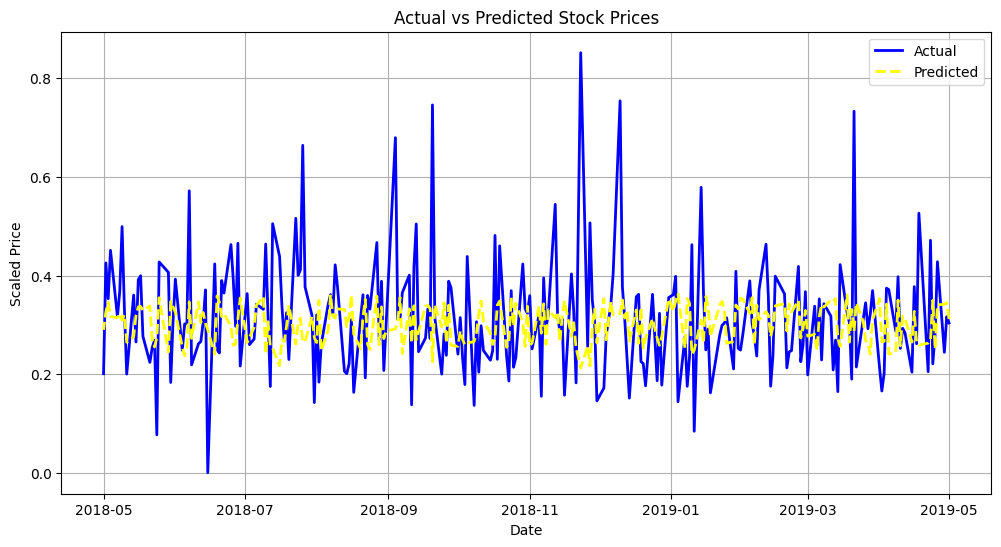

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# 1. Load and preprocess data
def load_and_preprocess_data(file_path):
    data = pd.read_excel(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    print("Available columns:", data.columns)  # Print available columns
    return data

# 2. Scale the data
def scale_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    # Adjust column names based on what's available in your DataFrame
    columns_to_scale = ['Open', 'High', 'Low', 'Close*', 'Volume']  # Removed 'Adj Close'
    scaled_data = scaler.fit_transform(data[columns_to_scale])
    return scaled_data, scaler

# ... (rest of the functions remain the same)

# Main execution
if __name__ == "__main__":
    # Load and preprocess data
    data = load_and_preprocess_data('/stock2018-2023.xlsx')

    # Scale data
    scaled_data, scaler = scale_data(data)

    # Split data
    X_train, X_test, y_train, y_test = split_data(scaled_data)

    # Create and train model
    model = create_model(X_train.shape[1])
    history = train_model(model, X_train, y_train)

    # Evaluate model
    loss, predictions, r_squared, mse, rmse = evaluate_model(model, X_test, y_test)

    # Print results
    print(f"Loss: {loss}")
    print(f"R-squared: {r_squared}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    # Plot results
    plot_results(data, X_train, y_test, predictions)

    # Get user input and make prediction
    predicted_price = get_user_input_and_predict(model, scaler)
    print(f"Predicted Closing Price: {predicted_price}")